In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable
import csv


Calibration curve for Magnetic field vs Current 

(Assuming Linear Fit)

+------------------------------------------+
|                Input Data                |
+----+-------+---------+--------+----------+
| i  |   x   |    y    |   x²   |    xy    |
+----+-------+---------+--------+----------+
| 1  |  0.0  |   0.0   |  0.0   |   0.0    |
| 2  |  0.3  |  436.0  |  0.09  |  130.8   |
| 3  |  0.6  |  904.0  |  0.36  |  542.4   |
| 4  |  0.9  |  1379.0 |  0.81  |  1241.1  |
| 5  |  1.2  |  1857.0 |  1.44  |  2228.4  |
| 6  |  1.51 |  2353.0 |  2.28  | 3553.03  |
| 7  |  1.8  |  2833.0 |  3.24  |  5099.4  |
| 8  |  2.1  |  3323.0 |  4.41  |  6978.3  |
| 9  |  2.58 |  4073.0 | 6.656  | 10508.34 |
| 10 |  2.68 |  4213.0 | 7.182  | 11290.84 |
| 11 |  2.8  |  4403.0 |  7.84  | 12328.4  |
| 12 |  3.0  |  4713.0 |  9.0   | 14139.0  |
| Σ  | 19.47 | 30487.0 | 43.309 | 68040.01 |
+----+-------+---------+--------+----------+ 

+--------------------------------------------+
|      Fit Results & Statistical Errors      |
+------------------+-----------+-------------+
| 

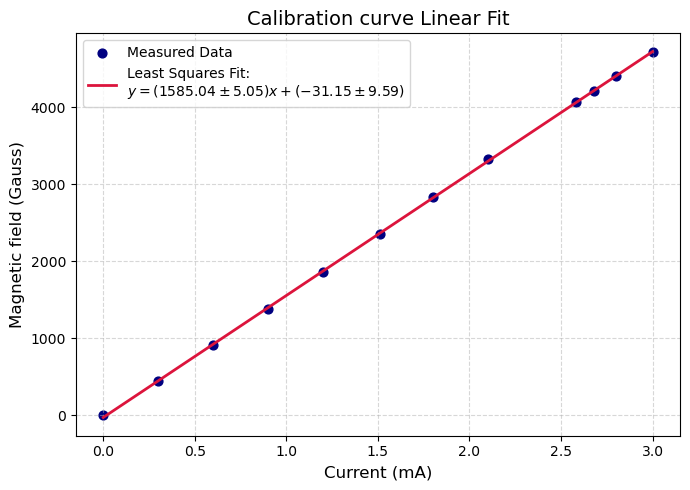

In [25]:
# Least Squares Linear Fit with Statistical Error Tables 

#x = Current
#y = Magnetic field

# --- Input Data ---
x = np.array([0,0.30,0.60,0.90,1.20,1.51,1.80,2.10,2.58,2.68,2.80,3.00], dtype=float)
y = np.array([137,573,1041,1516,1994,2490,2970,3460,4210,4350,4540,4850], dtype=float)
y = y - 137
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.2f} \pm {sigma_a1:.2f})x + ({a0:.2f} \pm {sigma_a0:.2f})$')
plt.xlabel("Current (mA)", fontsize=12)
plt.ylabel("Magnetic field (Gauss)", fontsize=12)
plt.title("Calibration curve Linear Fit", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
#Finding Magnetic field for current values operated
def B(I):
    return 1585.4*I - 31.15

#Table 1: n-type Si
I1 = np.array([1.00,1.21,1.52,1.82,2.18,2.42,2.80,2.97])
B1 = np.round(B(I1),0) 
print(np.round(B(I1),0))

[1554. 1887. 2379. 2854. 3425. 3806. 4408. 4677.]


In [27]:
#Table 1: n-type Si
V1 = np.array([20.1,21.2,23.4,25.2,27.1,28.4,30.3,31.7])
V1 = -V1
offset_V1 = -14.0
V_corrected1 = V1 - offset_V1
print(len(V1))
print(np.round(V_corrected1,1))

8
[ -6.1  -7.2  -9.4 -11.2 -13.1 -14.4 -16.3 -17.7]


In [28]:
#Table 2: n-type Ge
I2 = np.array([0.30,0.53,0.70,0.92,1.21,1.46,1.62,1.82,2.02,2.21,2.40,2.61,2.81,2.99])
B2 = np.round(B(I2),0)
print(np.round(B(I2),0))

[ 444.  809. 1079. 1427. 1887. 2284. 2537. 2854. 3171. 3473. 3774. 4107.
 4424. 4709.]


In [29]:
#Table 2: n-type Ge
V2 = np.array([2.4,4.6,6.5,8.8,12.0,14.6,16.3,18.5,20.6,22.5,24.5,26.6,28.6,30.3])
V2 = -V2
offset_V2 = 1.3
V_corrected2 = V2 - offset_V2
print(len(V2))
print(np.round(V_corrected2,1))

14
[ -3.7  -5.9  -7.8 -10.1 -13.3 -15.9 -17.6 -19.8 -21.9 -23.8 -25.8 -27.9
 -29.9 -31.6]


In [30]:
#Table 3: p-type Ge
I3 = np.array([0.25,0.42,0.61,0.82,1.05,1.30,1.42,1.53,1.64,1.76,1.92,2.05,2.15,2.27,2.52,2.71,2.85,2.97,])
B3 = np.round(B(I3),0)
print(np.round(B(I3),0))

[ 365.  635.  936. 1269. 1634. 2030. 2220. 2395. 2569. 2759. 3013. 3219.
 3377. 3568. 3964. 4265. 4487. 4677.]


In [31]:
#Table 3: p-type Ge
V3 = np.array([30.3,32.7,35.5,38.7,42.4,46.2,48.8,50.3,51.9,53.6,55.8,57.6,58.9,60.3,63.5,65.8,67.4,68.7])
V3 = V3
offset_V3 = 25.3
V_corrected3 = V3 - offset_V3
print(len(V3))
print(np.round(V_corrected3,1))

18
[ 5.   7.4 10.2 13.4 17.1 20.9 23.5 25.  26.6 28.3 30.5 32.3 33.6 35.
 38.2 40.5 42.1 43.4]


Hall Coefficient at Room Temperature

+----------------------------------------------+
|                  Input Data                  |
+---+---------+-------+------------+-----------+
| i |    x    |   y   |     x²     |     xy    |
+---+---------+-------+------------+-----------+
| 1 |  1554.0 |  -6.1 | 2414916.0  |  -9479.4  |
| 2 |  1887.0 |  -7.2 | 3560769.0  |  -13586.4 |
| 3 |  2379.0 |  -9.4 | 5659641.0  |  -22362.6 |
| 4 |  2854.0 | -11.2 | 8145316.0  |  -31964.8 |
| 5 |  3425.0 | -13.1 | 11730625.0 |  -44867.5 |
| 6 |  3806.0 | -14.4 | 14485636.0 |  -54806.4 |
| 7 |  4408.0 | -16.3 | 19430464.0 |  -71850.4 |
| 8 |  4677.0 | -17.7 | 21874329.0 |  -82782.9 |
| Σ | 24990.0 | -95.4 | 87301696.0 | -331700.4 |
+---+---------+-------+------------+-----------+ 

+------------------------------------------------+
|        Fit Results & Statistical Errors        |
+------------------+---------------+-------------+
|    Parameter     |     Value     | Uncertainty |
+------------------+---------------+-------------+
|    Slo

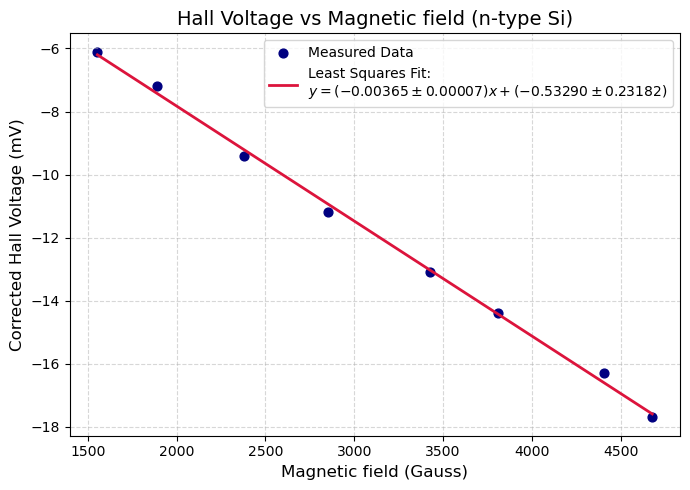

In [32]:
#Hall Coefficient
# Least Squares Linear Fit with Statistical Error Tables 

#y = Corrected Hall Voltage
#x = Magnetic field

# --- Input Data ---
x = np.round(B(I1),0)
y = V_corrected1
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.5f} \pm {sigma_a1:.5f})x + ({a0:.5f} \pm {sigma_a0:.5f})$')
plt.xlabel("Magnetic field (Gauss)", fontsize=12)
plt.ylabel("Corrected Hall Voltage (mV)", fontsize=12)
plt.title("Hall Voltage vs Magnetic field (n-type Si)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

+-------------------------------------------------+
|                    Input Data                   |
+----+---------+--------+-------------+-----------+
| i  |    x    |   y    |      x²     |     xy    |
+----+---------+--------+-------------+-----------+
| 1  |  444.0  |  -3.7  |   197136.0  |  -1642.8  |
| 2  |  809.0  |  -5.9  |   654481.0  |  -4773.1  |
| 3  |  1079.0 |  -7.8  |  1164241.0  |  -8416.2  |
| 4  |  1427.0 | -10.1  |  2036329.0  |  -14412.7 |
| 5  |  1887.0 | -13.3  |  3560769.0  |  -25097.1 |
| 6  |  2284.0 | -15.9  |  5216656.0  |  -36315.6 |
| 7  |  2537.0 | -17.6  |  6436369.0  |  -44651.2 |
| 8  |  2854.0 | -19.8  |  8145316.0  |  -56509.2 |
| 9  |  3171.0 | -21.9  |  10055241.0 |  -69444.9 |
| 10 |  3473.0 | -23.8  |  12061729.0 |  -82657.4 |
| 11 |  3774.0 | -25.8  |  14243076.0 |  -97369.2 |
| 12 |  4107.0 | -27.9  |  16867449.0 | -114585.3 |
| 13 |  4424.0 | -29.9  |  19571776.0 | -132277.6 |
| 14 |  4709.0 | -31.6  |  22174681.0 | -148804.4 |
| Σ  | 36979

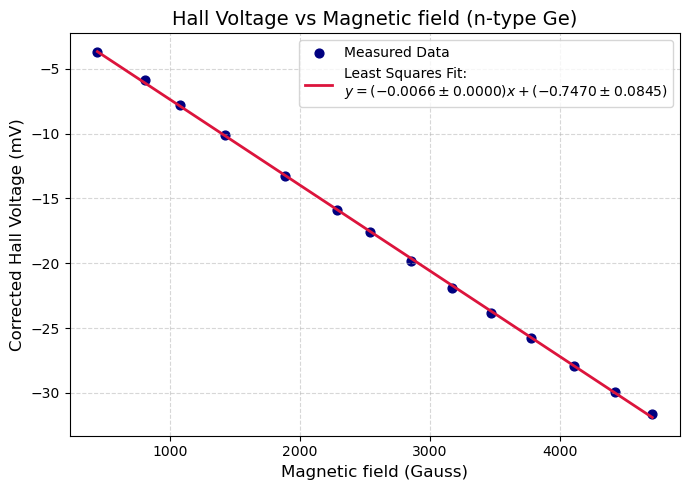

In [33]:
#Hall Coefficient calculation
# Least Squares Linear Fit with Statistical Error Tables 

#y = Corrected Hall Voltage
#x = Magnetic field

# --- Input Data ---
x = B2
y = V_corrected2
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.4f} \pm {sigma_a1:.4f})x + ({a0:.4f} \pm {sigma_a0:.4f})$')
plt.xlabel("Magnetic field (Gauss)", fontsize=12)
plt.ylabel("Corrected Hall Voltage (mV)", fontsize=12)
plt.title("Hall Voltage vs Magnetic field (n-type Ge)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

[ 365.  635.  936. 1269. 1634. 2030. 2220. 2395. 2569. 2759. 3013. 3219.
 3377. 3568. 3964. 4265. 4487. 4677.]
+------------------------------------------------+
|                   Input Data                   |
+----+---------+-------+-------------+-----------+
| i  |    x    |   y   |      x²     |     xy    |
+----+---------+-------+-------------+-----------+
| 1  |  365.0  |  5.0  |   133225.0  |   1825.0  |
| 2  |  635.0  |  7.4  |   403225.0  |   4699.0  |
| 3  |  936.0  |  10.2 |   876096.0  |   9547.2  |
| 4  |  1269.0 |  13.4 |  1610361.0  |  17004.6  |
| 5  |  1634.0 |  17.1 |  2669956.0  |  27941.4  |
| 6  |  2030.0 |  20.9 |  4120900.0  |  42427.0  |
| 7  |  2220.0 |  23.5 |  4928400.0  |  52170.0  |
| 8  |  2395.0 |  25.0 |  5736025.0  |  59875.0  |
| 9  |  2569.0 |  26.6 |  6599761.0  |  68335.4  |
| 10 |  2759.0 |  28.3 |  7612081.0  |  78079.7  |
| 11 |  3013.0 |  30.5 |  9078169.0  |  91896.5  |
| 12 |  3219.0 |  32.3 |  10361961.0 |  103973.7 |
| 13 |  3377.0 |  33.6

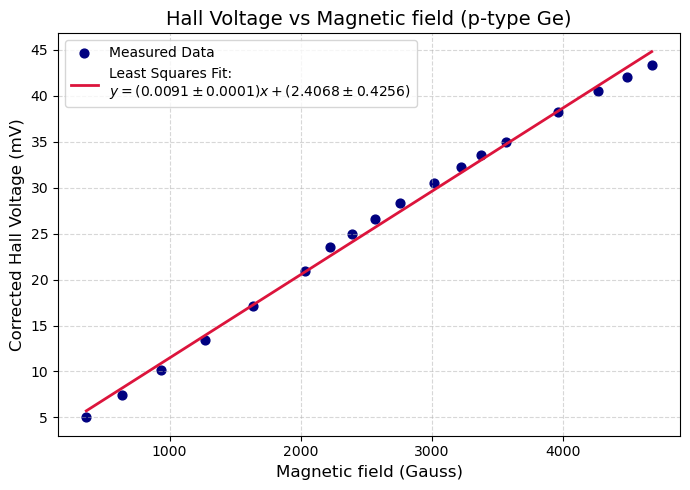

In [34]:
#Hall Coefficient
# Least Squares Linear Fit with Statistical Error Tables 

#y = Corrected Hall Voltage
#x = Magnetic field

# --- Input Data ---
x = B3
y = V_corrected3
print(x)
n = len(x)
# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.4f} \pm {sigma_a1:.4f})x + ({a0:.4f} \pm {sigma_a0:.4f})$')
plt.xlabel("Magnetic field (Gauss)", fontsize=12)
plt.ylabel("Corrected Hall Voltage (mV)", fontsize=12)
plt.title("Hall Voltage vs Magnetic field (p-type Ge)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [35]:
#Observations at room temperature 
#n-type Si

slope = -0.0036
t = 0.5
I = 1.69

RH_room = (slope * t*10) / I
print("Hall Coefficient at room temperature:", RH_room)

Hall Coefficient at room temperature: -0.010650887573964497


In [36]:
#n-type Ge

slope = -0.0066
t = 0.5
I = 3.24

RH_room = (slope * t*10) / I
print("Hall Coefficient at room temperature:", RH_room)

Hall Coefficient at room temperature: -0.010185185185185184


In [37]:
#p-type Ge

slope = 0.0091
t = 0.5
I = 3.63
RH_room = (slope * t*10) / I
print("Hall Coefficient at room temperature:", RH_room)

Hall Coefficient at room temperature: 0.012534435261707989


Hall Coefficient vs Temperature at fixed probe current

In [38]:
def Hall_coeff(Vy):
    I = 3.83
    t = 0.5
    H = B(1.50)
    print(B(1))
    RH = (Vy * t*10) / (I * H)
    return RH

+------------------------------------------+
|                Input Data                |
+-----+--------+------+---------+----------+
|  i  |   x    |  y   |    x²   |    xy    |
+-----+--------+------+---------+----------+
|  1  |  0.0   |  0   |   0.0   |   0.0    |
|  2  |  0.04  |  1   |  0.002  |   0.04   |
|  3  |  0.08  |  2   |  0.006  |   0.16   |
|  4  |  0.12  |  3   |  0.014  |   0.36   |
|  5  |  0.16  |  4   |  0.026  |   0.64   |
|  6  |  0.2   |  5   |   0.04  |   1.0    |
|  7  |  0.24  |  6   |  0.058  |   1.44   |
|  8  |  0.28  |  7   |  0.078  |   1.96   |
|  9  |  0.32  |  8   |  0.102  |   2.56   |
|  10 |  0.36  |  9   |   0.13  |   3.24   |
|  11 |  0.4   |  10  |   0.16  |   4.0    |
|  12 |  0.44  |  11  |  0.194  |   4.84   |
|  13 |  0.48  |  12  |   0.23  |   5.76   |
|  14 |  0.52  |  13  |   0.27  |   6.76   |
|  15 |  0.56  |  14  |  0.314  |   7.84   |
|  16 |  0.6   |  15  |   0.36  |   9.0    |
|  17 |  0.64  |  16  |   0.41  |  10.24   |
|  18 |  0

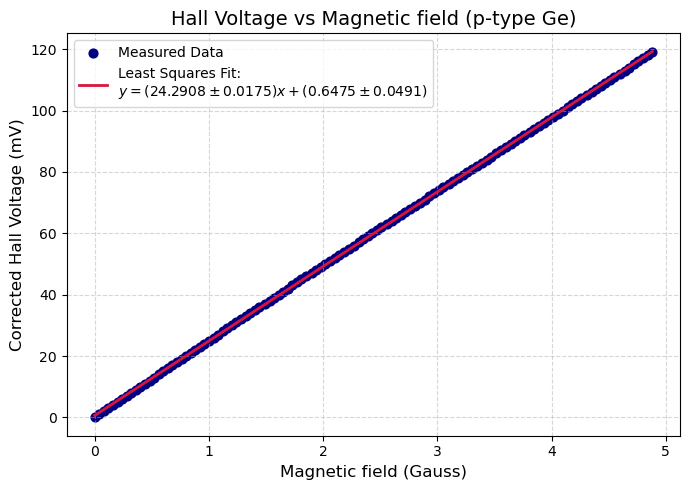

In [39]:
#Temperture vs Thermo emf
# Least Squares Linear Fit with Statistical Error Tables 

#y = Temperature
#x = Thermo Emf

# --- Input Data ---
x = np.array([ 0.00, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24, 0.28, 0.32, 0.36,
    0.40, 0.44, 0.48, 0.52, 0.56, 0.60, 0.64, 0.68, 0.72, 0.76,
    0.80, 0.84, 0.88, 0.92, 0.96, 1.00, 1.04, 1.08, 1.12, 1.16,
    1.20, 1.24, 1.28, 1.32, 1.36, 1.40, 1.44, 1.49, 1.53, 1.57,
    1.61, 1.65, 1.69, 1.73, 1.77, 1.81, 1.85, 1.90, 1.94, 1.98,
    2.02, 2.06, 2.10, 2.14, 2.18, 2.23, 2.27, 2.31, 2.35, 2.39,
    2.43, 2.47, 2.51, 2.56, 2.60, 2.64, 2.68, 2.72, 2.76, 2.80,
    2.85, 2.89, 2.93, 2.97, 3.01, 3.05, 3.10, 3.14, 3.18, 3.22,
    3.26, 3.30, 3.35, 3.39, 3.43, 3.47, 3.51, 3.56, 3.60, 3.64,
    3.68, 3.72, 3.76, 3.81, 3.85, 3.89, 3.93, 3.97, 4.01, 4.06,
    4.10, 4.14, 4.18, 4.22, 4.26, 4.31, 4.35, 4.39, 4.43, 4.47,
    4.51, 4.55, 4.60, 4.64, 4.68, 4.72, 4.76, 4.80, 4.84, 4.88])
y = np.arange(0,120,1)
n = len(x)
# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.4f} \pm {sigma_a1:.4f})x + ({a0:.4f} \pm {sigma_a0:.4f})$')
plt.xlabel("Magnetic field (Gauss)", fontsize=12)
plt.ylabel("Corrected Hall Voltage (mV)", fontsize=12)
plt.title("Hall Voltage vs Magnetic field (p-type Ge)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [40]:
def Temp(V):
    return a0 + a1*V

1554.25


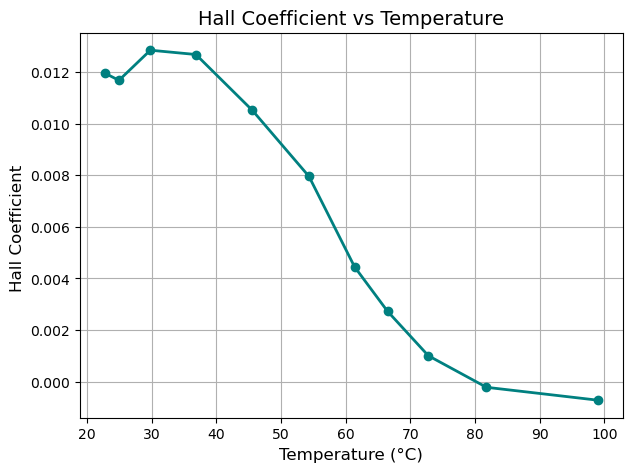

In [42]:
#Plot of Hall Coefficient vs Temperature
x = Temp(np.array([0,0.09,0.29,0.58,0.94,1.30,1.59, 1.80,2.06, 2.43, 3.14]) + 0.91)
y = Hall_coeff(np.array([21.5,21,23.1,22.8,18.9,14.3,8, 4.9,1.8, -0.4, -1.3]))

plt.figure(figsize=(7,5))
plt.plot(x,y,marker='o', color='teal', linestyle='-', linewidth=2, markersize=6)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Hall Coefficient ", fontsize=12)
plt.title("Hall Coefficient vs Temperature", fontsize=14)
plt.grid(True)
plt.show()